# Final Project : Pagerank Implementation
### Michael Osmian
### Math 443 : Professor Rodriguez

* Chapter 12 of "Matrix Methods in Data Mining and Pattern Recognition". 

## Random Surfer Model Implementation

### Graph
The matrix to be used in this python implementation of pagerank is found within the textbook. It is a reducible matrix meaning there exist sets of recurrent states where a random surfer may get stuck upon entering so the techniques outlined for adding a teleportation process must be applied. It also contains rank sinks where if a surfer ends up at that state, in this example, state 4 it will be stuck forever and never leave anywhere. 
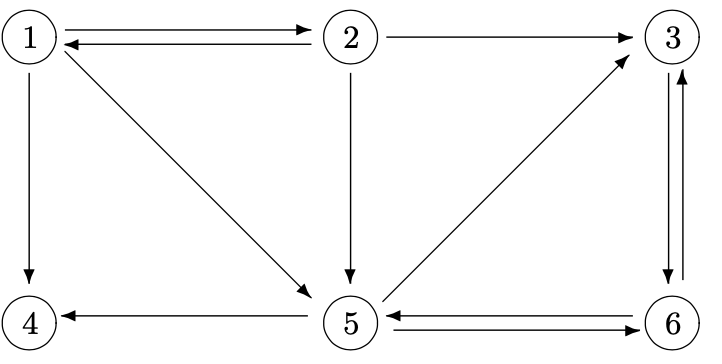

### Generating $Q$ Matrix and $Q^{T}$
The Matrix $Q$ is the adjacency matrix for this graph above. Rows represent the inlinks and columns the outlinks. The transpose is the opposite respectively. So $Q$ is:
\begin{equation}
  Q_{ij} =
    \begin{cases}
      \frac{1}{N_{j}} & \text{if there is a link from j to i }\\
      0 & \text{else}\\
    \end{cases}       
\end{equation}

In [1]:
import numpy as np
# from scipy.linalg import solve
from numpy import linalg as LA

Q = np.matrix([
    [0,1/3,0,0,0,0],
    [1/3,0,0,0,0,0],
    [0,1/3,0,0,1/3,1/2],
    [1/3,0,0,0,1/3,0],
    [1/3,1/3,0,0,0,1/2],
    [0,0,1,0,1/3,0],
])
print("Q Matrix")
j = 1
for i in Q:
    print(i)
print()
print("Q Transpose Matrix")
for i in Q.T:
    print(i)

Q Matrix
[[0.         0.33333333 0.         0.         0.         0.        ]]
[[0.33333333 0.         0.         0.         0.         0.        ]]
[[0.         0.33333333 0.         0.         0.33333333 0.5       ]]
[[0.33333333 0.         0.         0.         0.33333333 0.        ]]
[[0.33333333 0.33333333 0.         0.         0.         0.5       ]]
[[0.         0.         1.         0.         0.33333333 0.        ]]

Q Transpose Matrix
[[0.         0.33333333 0.         0.33333333 0.33333333 0.        ]]
[[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.33333333 0.33333333 0.         0.33333333]]
[[0.  0.  0.5 0.  0.5 0. ]]


### Generating Matrix P 

Using the equations outlined for $d$ and the ones vector $e$:
    \begin{equation}
  d_{j} =
    \begin{cases}
      1 & \text{if $N_{j} = 0$}\\
      0 & \text{else}\\
    \end{cases}       
\end{equation}
Define a matrix $P$ to be,
\begin{equation}
    P = Q + \frac{1}{n}ed^{T}
\end{equation}

In [2]:
# Since Q has no columns of just 0 in this example it is a 0 vector
d = np.array([0,0,0,1,0,0])
e = np.array([1 for i in range(6)])
P = Q + (1/6)*e*d.T
print("Matrix P")
for i in P:
    print(i)

Matrix P
[[0.         0.33333333 0.         0.16666667 0.         0.        ]]
[[0.33333333 0.         0.         0.16666667 0.         0.        ]]
[[0.         0.33333333 0.         0.16666667 0.33333333 0.5       ]]
[[0.33333333 0.         0.         0.16666667 0.33333333 0.        ]]
[[0.33333333 0.33333333 0.         0.16666667 0.         0.5       ]]
[[0.         0.         1.         0.16666667 0.33333333 0.        ]]


### Verifying it is column stochastic

Using the equation:
    $$e^{T}P = e^{T}$$

In [3]:
LHS = e.T*P
RHS = e.T
LHS = LHS.tolist()
print("Verifying Indices")
for i in range(6):
    print(LHS[0][i] == RHS[i])

Verifying Indices
True
True
True
True
True
True


### Ensuring the matrix is irreducible for uniqueness
Using the equation:
    $$A = \alpha P + (1-\alpha)\frac{1}{n}ee^{T}$$
Letting
$$\alpha = 0.85$$

In [4]:
alpha = 0.85
n = 6
A = alpha*P + (1-alpha)*(1/n)*e*e.T
print("Matrix A")
for i in A:
    print(i)

print()
print("Ensuring it is still column stochastic")
LHS = e.T*A
RHS = e.T
LHS = LHS.tolist()
print("Verifying Indices")
for i in range(6):
    print(LHS[0][i] == RHS[i])
    


Matrix A
[[0.025      0.30833333 0.025      0.16666667 0.025      0.025     ]]
[[0.30833333 0.025      0.025      0.16666667 0.025      0.025     ]]
[[0.025      0.30833333 0.025      0.16666667 0.30833333 0.45      ]]
[[0.30833333 0.025      0.025      0.16666667 0.30833333 0.025     ]]
[[0.30833333 0.30833333 0.025      0.16666667 0.025      0.45      ]]
[[0.025      0.025      0.875      0.16666667 0.30833333 0.025     ]]

Ensuring it is still column stochastic
Verifying Indices
True
True
True
True
True
True


### Finding the PageRank Vector
The pagerank vector or the first eigenvector is the stationary distribution of this chain

In [5]:
import math
w,v = np.linalg.eig(A)
# print(w)
r = v[:,0]   
r_l = r.tolist()
print("First Eigenvalue: ",math.ceil(w[0]))
print("Corresponding Eigenvector / Pagerank Vector")
for i in r_l:
    print(i)

First Eigenvalue:  1
Corresponding Eigenvector / Pagerank Vector
[0.12284107773520728]
[0.12284107773520765]
[0.5281873087507732]
[0.24713807478959374]
[0.4386952837213628]
[0.6612923152027754]


### Example 2 : 


### Graph

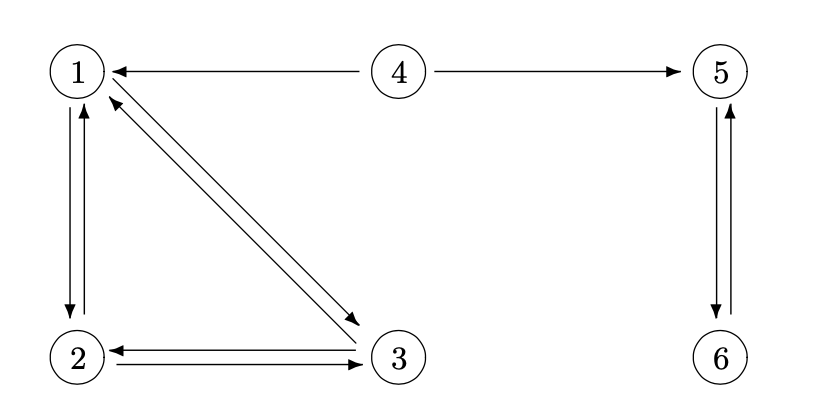

### Generating $Q$ Matrix and $Q^{T}$
The Matrix $Q$ is the adjacency matrix for this graph above. Rows represent the inlinks and columns the outlinks. The transpose is the opposite respectively. So $Q$ is:
\begin{equation}
  Q_{ij} =
    \begin{cases}
      \frac{1}{N_{j}} & \text{if there is a link from j to i }\\
      0 & \text{else}\\
    \end{cases}       
\end{equation}

In [7]:
import numpy as np
# from scipy.linalg import solve
from numpy import linalg as LA

Q = np.matrix([
    [0,1/2,1/2,1/2,0,0],
    [1/2,0,1/2,0,0,0],
    [1/2,1/2,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,1/2,0,1],
    [0,0,0,0,1,0],
])
print("Q Matrix")
j = 1
for i in Q:
    print(i)
print()
print("Q Transpose Matrix")
for i in Q.T:
    print(i)

Q Matrix
[[0.  0.5 0.5 0.5 0.  0. ]]
[[0.5 0.  0.5 0.  0.  0. ]]
[[0.5 0.5 0.  0.  0.  0. ]]
[[0. 0. 0. 0. 0. 0.]]
[[0.  0.  0.  0.5 0.  1. ]]
[[0. 0. 0. 0. 1. 0.]]

Q Transpose Matrix
[[0.  0.5 0.5 0.  0.  0. ]]
[[0.5 0.  0.5 0.  0.  0. ]]
[[0.5 0.5 0.  0.  0.  0. ]]
[[0.5 0.  0.  0.  0.5 0. ]]
[[0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 1. 0.]]


### Generating Matrix P 

Using the equations outlined for $d$ and the ones vector $e$:
    \begin{equation}
  d_{j} =
    \begin{cases}
      1 & \text{if $N_{j} = 0$}\\
      0 & \text{else}\\
    \end{cases}       
\end{equation}
Define a matrix $P$ to be,
\begin{equation}
    P = Q + \frac{1}{n}ed^{T}
\end{equation}

In [24]:
# Since Q has no columns of just 0 in this example it is a 0 vector
d = np.array([0,0,0,0,0,0])
e = np.array([1 for i in range(6)])
P = Q + (1/6)*e*d.T

### Verifying it is column stochastic

Using the equation:
    $$e^{T}P = e^{T}$$

In [199]:
LHS = e.T*P
RHS = e.T
LHS = LHS.tolist()
print("Verifying Indices")
for i in range(6):
    print(LHS[0][i] == RHS[i])

Verifying Indices
True
True
True
True
True
True


### Ensuring the matrix is irreducible for uniqueness
Using the equation:
    $$A = \alpha P + (1-\alpha)\frac{1}{n}ee^{T}$$
Letting
$$\alpha = 0.85$$

In [16]:
alpha = 0.85
n = 6
A = alpha*P + (0.15/n)*e*e.T
print("Matrix A")
for i in A:
    print(i)

print()
print("Ensuring it is still column stochastic")
LHS = e.T*A
RHS = e.T
LHS = LHS.tolist()
print("Verifying Indices")
for i in range(6):
    print(LHS[0][i] == RHS[i])

Matrix A
[[0.025 0.45  0.45  0.45  0.025 0.025]]
[[0.45  0.025 0.45  0.025 0.025 0.025]]
[[0.45  0.45  0.025 0.025 0.025 0.025]]
[[0.025 0.025 0.025 0.025 0.025 0.025]]
[[0.025 0.025 0.025 0.45  0.025 0.875]]
[[0.025 0.025 0.025 0.025 0.875 0.025]]

Ensuring it is still column stochastic
Verifying Indices
True
True
True
True
True
True


In [43]:
import math
w,v = np.linalg.eig(-A)
# print(w)
r = v[:,0]   
r_l = r.tolist()
print("First Eigenvalue: ",-w[0])
print("Corresponding Eigenvector / Pagerank Vector")
for i in r_l:
    print(i)

First Eigenvalue:  1.0000000000000002
Corresponding Eigenvector / Pagerank Vector
[0.4467908869686829]
[0.4297288613337869]
[0.4297288613337869]
[0.05720796830523761]
[0.4690022626825789]
[0.45585989158542967]
